In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweet-sentiment-extraction/sample_submission.csv
/kaggle/input/tweet-sentiment-extraction/train.csv
/kaggle/input/tweet-sentiment-extraction/test.csv


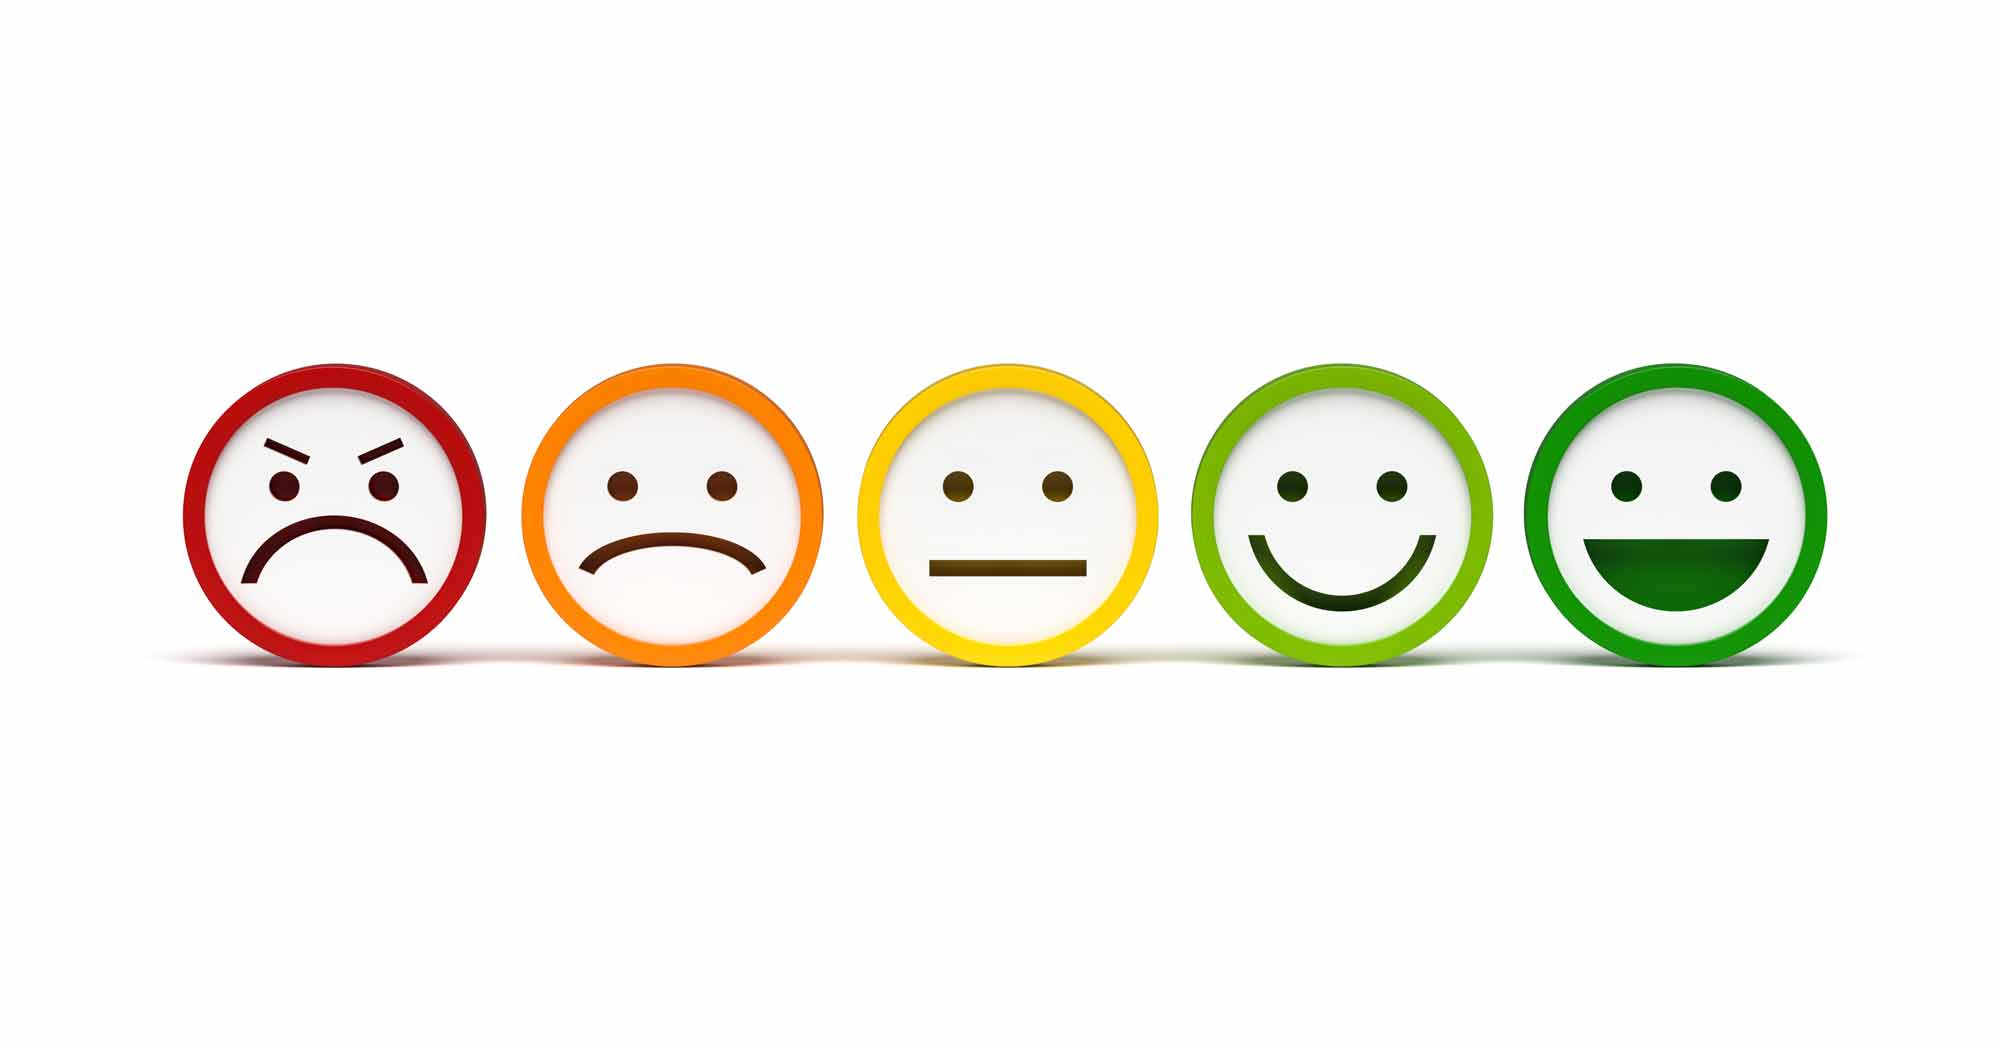

# About competetion:

"My ridiculous dog is amazing." [sentiment: positive]

With all of the tweets circulating every second it is hard to tell whether the sentiment behind a specific tweet will impact a company, or a person's, brand for being viral (positive), or devastate profit because it strikes a negative tone. Capturing sentiment in language is important in these times where decisions and reactions are created and updated in seconds. But, which words actually lead to the sentiment description? In this competition you will need to pick out the part of the tweet (word or phrase) that reflects the sentiment.

Help build your skills in this important area with this broad dataset of tweets. Work on your technique to grab a top spot in this competition. What words in tweets support a positive, negative, or neutral sentiment? How can you help make that determination using machine learning tools?


# What am I predicting?
You're attempting to predict the word or phrase from the tweet that exemplifies the provided sentiment. The word or phrase should include all characters within that span (i.e. including commas, spaces, etc.). The format is as follows:

For example:

2,"very good"
5,"I am neutral about this"
6,"bad"
8,"if you say so!"
etc.

# Files
* train.csv - the training set
* test.csv - the test set
* sample_submission.csv - a sample submission file in the correct format

# Columns
* textID - unique ID for each piece of text
* text - the text of the tweet
* sentiment - the general sentiment of the tweet
* selected_text - [train only] the text that supports the tweet's sentiment

# About this Notebook
In this kernel, I will briefly explain the structure of dataset.I will generate and analyze metafeatures. Then, I will visualize the dataset using Matplotlib, seaborn and Plotly to gain as much insight as I can . 

# Similarity score¶
The metrics used in this competition is a word level Jaccard score. It is a measure of how similar/dissimilar the two sets of sentences are.

Implementation of Jaccard score in Python:

The Jaccard index, also known as the Jaccard similarity coefficient, is a statistic used for gauging the similarity and diversity of sample sets. It was developed by Grove Karl Gilbert in 1884 as his ratio of verification and now is frequently referred to as the Critical Success Index in meteorology.
The Jaccard similarity measures the similarity between two sets of data to see which members are shared and distinct. The Jaccard similarity is calculated by dividing the number of observations in both sets by the number of observations in either set.

In [2]:
def jaccard_score(x, y):
    z = x.intersection(y)
    return float(len(z)) / (len(x) + len(y) - len(z))

sentence_1 = "My name is Senapati Rajesh"
sentence_2 = "I am Rajesh"
sentence_3="My name is Raj"
sentence_4="My name is Senapati"
sentence_5="Senapati Rajesh"
sentence_6="My name"
s1 = set(sentence_1.lower().split())
s2 = set(sentence_2.lower().split())
s3 = set(sentence_3.lower().split())
s4 = set(sentence_4.lower().split())
s5 = set(sentence_5.lower().split())
s6 = set(sentence_6.lower().split())

print('Jaccard_score(s1, s2)',jaccard_score(s1, s2))
print('Jaccard_score(s1, s3)',jaccard_score(s1, s3))
print('Jaccard_score(s1, s4)',jaccard_score(s1, s4))
print('Jaccard_score(s1, s5)',jaccard_score(s1, s5))
print('Jaccard_score(s1, s6)',jaccard_score(s1, s6))
print('Jaccard_score(s2, s6)',jaccard_score(s2, s6))

Jaccard_score(s1, s2) 0.14285714285714285
Jaccard_score(s1, s3) 0.5
Jaccard_score(s1, s4) 0.8
Jaccard_score(s1, s5) 0.4
Jaccard_score(s1, s6) 0.4
Jaccard_score(s2, s6) 0.0


sentence_1 = "My name is Senapati Rajesh" and sentence_4="My name is Senapati"
has highest score!!!!.

In [3]:
#What intersection does
# sentence_1 = "My name is Senapati Rajesh"
# sentence_2 = "I am Rajesh"
s1.intersection(s2)

{'rajesh'}

# 1.Importing Necessary Libraries

In [4]:

import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from collections import defaultdict,Counter

from plotly.subplots import make_subplots
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords


from textblob import TextBlob

from nltk.util import ngrams
import plotly.offline as py
import plotly.express as px
from statistics import *
from plotly import tools

from tqdm import tqdm
import string
import json
import gc

import nltk
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# 2.Reading the data

In [5]:
train = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/train.csv')
test = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/test.csv')
sample = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/sample_submission.csv')

In [6]:
train.sample(5)

,textID,text,selected_text,sentiment
26168,ad8097af47,all my worms either escaped or died bums!,all my worms either escaped or died bums!,neutral
27373,7523a28376,hey you weirdo! haha jk! I love you!,love,positive
11585,93d42cc242,Watching loudQUIETloud documentary about the e...,Fantastic,positive
5605,c2574b4332,- Gig was awesome! Am exahausted and so dont w...,- Gig was awesome! Am exahausted and so dont w...,neutral
828,252e56c4d1,So tired & ready for bed!! Really in the mood ...,So tired &,negative


* Target column sentiment(Negative/Positive/neutral)

In [7]:
test.sample(2)

,textID,text,sentiment
2848,b2309cd1ce,tweeterizing from a mobile,neutral
2458,ceab14b717,Heading to the office through a very quiet Sto...,neutral


In [8]:
sample.sample(2)

,textID,selected_text
1718,0b8b37ba52,NaN
1168,aab1caabf0,NaN


# 3.Shape of the data

In [9]:
print(train.shape)
print(test.shape)
print(sample.shape)

(27481, 4)
(3534, 3)
(3534, 2)


* In train set, we have 27481 rows and 4 columns
* In test set, we have 3534 rows and 3 columns(selected_text is not there)
* In sample set, we have 3534 rows with 2 columns(text_id,selected_text are present)

# 4.Type of data and Missing values

In [10]:
print(train.info())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
None
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


* All are object and we have only one missing value in text and selected text columns in training dataset. Let's check for test dataset as well

In [11]:
print(test.info())
print(test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB
None
textID       0
text         0
sentiment    0
dtype: int64


* Great!!!No missing values

# 5.Missing value treatment

We have one null Value in the train , as the test field for value is NAN we will just remove it

In [12]:
train.dropna(axis=0,inplace=True)

In [13]:
train.shape

(27480, 4)

In [14]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


# 6.EDA

In [15]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)

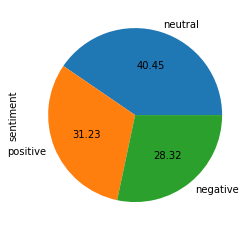

<AxesSubplot:xlabel='sentiment', ylabel='count'>

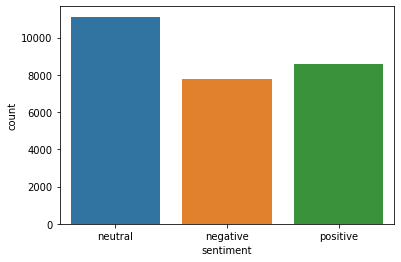

In [16]:
train['sentiment'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()
sns.countplot(train['sentiment'])

* Percentage wise-We have major comments of neutral-40.45% followed by positive 31.23% and Negative 28.32%
* Count wise-We have major comments of neutral-11,117 followed by positive 8,582 and Negative 7,782

# Creating meta features

In [17]:
train['text'][0]

' I`d have responded, if I were going'

Letter count of 1st sentence

In [18]:
train['text'].apply(lambda x:len(str(x)))[0]

36

word count of 1st sentence

In [19]:
train['text'].apply(lambda x:len(str(x).split()))[0]

7

In [20]:
# Adding interesting variables for analysis
train['length'] = train['text'].apply(lambda x:len(str(x)))
train['word_counts'] = train['text'].apply(lambda x:len(str(x).split()))
train['Unique_words']=train['text'].apply(lambda x: len(set(str(x).split())))#unique word count
train['stop_words_count']=train['text'].apply(lambda x:len([w for w in str(x).lower().split() if w in STOPWORDS]))
train['mean_word_length']=train['text'].apply(lambda x:np.mean([len(w) for w in str(x).lower().split()]))
#Punctuations
train['Punctuation_count']=train['text'].apply(lambda x:len([w for w in str(x) if w in string.punctuation]))


train['word_counts_ST'] = train['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
train['difference_in_words'] = train['word_counts'] - train['word_counts_ST'] #Difference in Number of words text and Selected Text

neutral = train[train['sentiment'] == 'neutral']
positive = train[train['sentiment'] == 'positive']
negative = train[train['sentiment'] == 'negative']


In [21]:
colors=['blue','red','green']
sent=train.sentiment.unique()

# Let's taste the EDA speciality

In [22]:
train.head()

,textID,text,selected_text,sentiment,length,word_counts,Unique_words,stop_words_count,mean_word_length,Punctuation_count,word_counts_ST,difference_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,7,7,4,4.142857,2,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,10,10,4,3.600000,3,2,8
2,088c60f138,my boss is bullying me...,bullying me,negative,25,5,5,2,4.200000,3,2,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,5,5,2,5.200000,1,3,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,14,14,7,4.357143,6,3,11


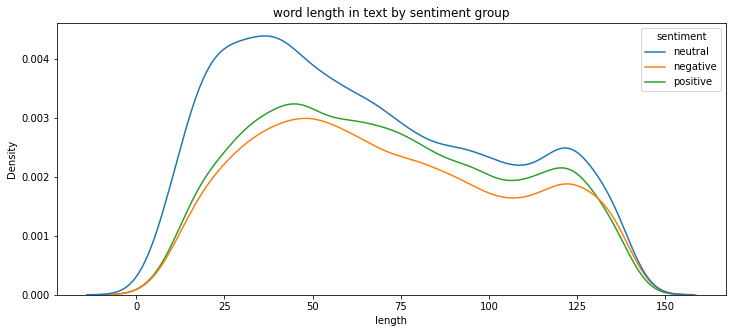

In [23]:
plt.figure(figsize=(12,5))
sns.kdeplot(x=train.length,hue=train.sentiment)
plt.title('word length in text by sentiment group')
plt.show()

* The number of character in tweets ranges from 1 to 160 (max).
* More tweets contains less than 60 characters.
* Some spike we have observed after 110

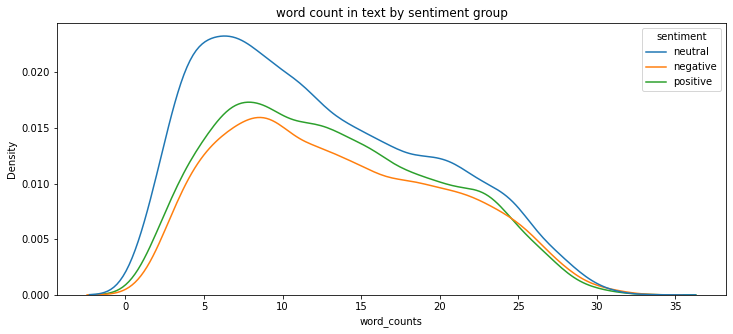

In [24]:
plt.figure(figsize=(12,5))
sns.kdeplot(x=train.word_counts,hue=train.sentiment)
plt.title('word count in text by sentiment group')
plt.show()

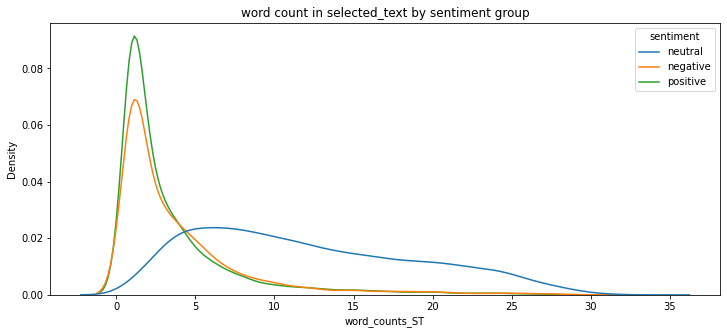

In [25]:
plt.figure(figsize=(12,5))
sns.kdeplot(x=train.word_counts_ST,hue=train.sentiment)
plt.title('word count in selected_text by sentiment group')
plt.show()

* Mostly less than 5 words count found in selected text where as it is less than 15 for text column
* The selected test is of much larger length in neutral sentiment tweets.Why is this ? We wil find out later..
* The distribution of selected texts in positive and negative are almost the same.

In [26]:
x1 = neutral.length.values
x2 = positive.length.values
x3 = negative.length.values

fig = go.Figure(data=[go.Histogram(x=x1,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5, 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of neutral tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x2,
                                   marker_line_width=1, 
                                   marker_color='rgb(50,202,50)', 
                                   xbins_size = 5, 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of positive tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x3,
                                   marker_line_width=1, 
                                   marker_color='crimson', 
                                   xbins_size = 5, 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of negative tweet lengths')
fig.show()

It can also be seen on these plots that the minimum tweets length value is close to zero. Let's take a closer look at these tweets.

In [27]:
short_tweet_index=[index for index,tweet in enumerate(train['text']) if len(str(tweet))<=5]
train.iloc[short_tweet_index,:]

,textID,text,selected_text,sentiment,length,word_counts,Unique_words,stop_words_count,mean_word_length,Punctuation_count,word_counts_ST,difference_in_words
238,e98226e842,Thx,Thx,neutral,4,1,1,0,3.0,0,1,0
641,5210cc55ae,no,no,neutral,3,1,1,1,2.0,0,1,0
735,a1bda541fd,yep,yep,neutral,4,1,1,0,3.0,0,1,0
1308,823122597e,mean,mean,neutral,5,1,1,0,4.0,0,1,0
1668,a2f9a26b7d,aww,aww,neutral,4,1,1,0,3.0,0,1,0
3447,06a28a5f3e,Why?,Why?,neutral,5,1,1,0,4.0,1,1,0
3675,f18b9435c8,with,with,neutral,5,1,1,1,4.0,0,1,0
5790,8560ce3f2e,Hey,Hey,neutral,4,1,1,0,3.0,0,1,0
6596,1cfb46972e,good,good,positive,5,1,1,0,4.0,0,1,0
6746,8f8fe5e150,Yep.,Yep.,neutral,5,1,1,0,4.0,1,1,0


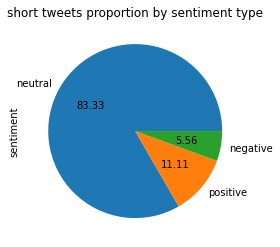

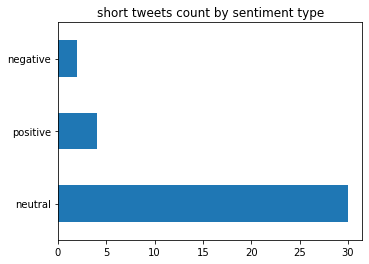

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
train.iloc[short_tweet_index,:]['sentiment'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('short tweets proportion by sentiment type')


plt.figure(figsize=(12,4))
plt.subplot(1, 2, 2)
train.iloc[short_tweet_index,:]['sentiment'].value_counts().plot(kind='barh')
plt.title('short tweets count by sentiment type')
plt.show()

* 83% of smallest tweets are neutral!!Great!! 
# But what about less than 3 character length?

In [29]:
indexes = [index for index, tweet in enumerate(train['text']) if len(str(tweet)) == 3 ]
train.iloc[indexes,:]

,textID,text,selected_text,sentiment,length,word_counts,Unique_words,stop_words_count,mean_word_length,Punctuation_count,word_counts_ST,difference_in_words
641,5210cc55ae,no,no,neutral,3,1,1,1,2.0,0,1,0
11524,4105b6a05d,aw,aw,neutral,3,1,1,0,2.0,0,1,0
14339,5c6abc28a1,ow,ow,neutral,3,1,1,0,2.0,0,1,0
25699,ee8ee67cb3,ME,ME,neutral,3,1,1,1,2.0,0,1,0
26005,0b3fe0ca78,?,?,neutral,3,1,1,0,1.0,1,1,0


* Bingo All are neutral

In [30]:
train.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'length', 'word_counts',
       'Unique_words', 'stop_words_count', 'mean_word_length',
       'Punctuation_count', 'word_counts_ST', 'difference_in_words'],
      dtype='object')

In [31]:
train.select_dtypes('int64') 
#convert into list----------------
columns = list(train.select_dtypes('int64'))
#prints a list of all integer columns--------
columns 

['length',
 'word_counts',
 'Unique_words',
 'stop_words_count',
 'Punctuation_count',
 'word_counts_ST',
 'difference_in_words']

<Figure size 432x288 with 0 Axes>

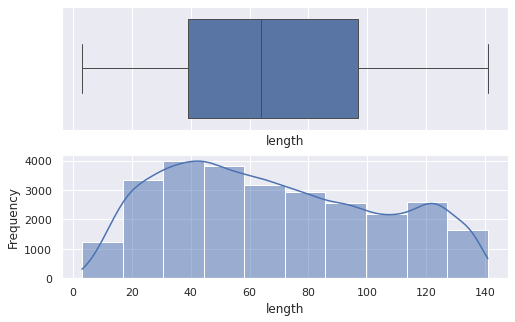

<Figure size 576x360 with 0 Axes>

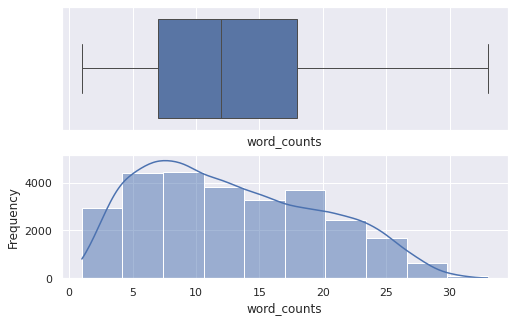

<Figure size 576x360 with 0 Axes>

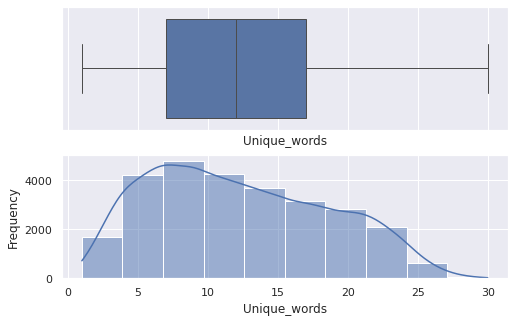

<Figure size 576x360 with 0 Axes>

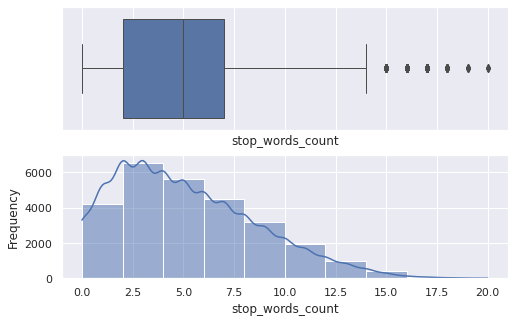

<Figure size 576x360 with 0 Axes>

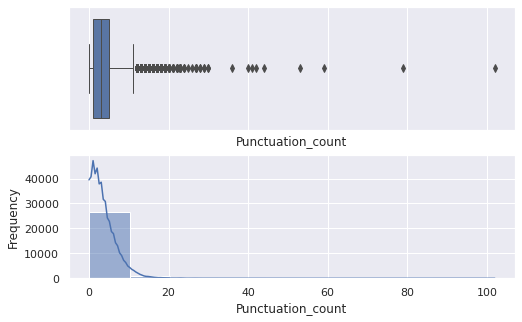

<Figure size 576x360 with 0 Axes>

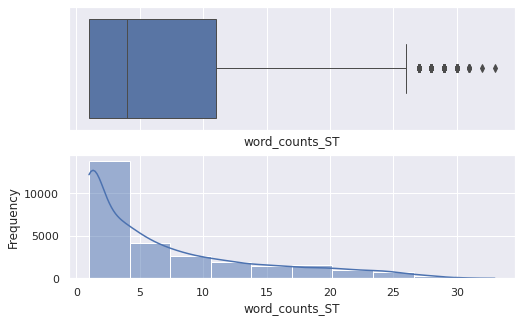

<Figure size 576x360 with 0 Axes>

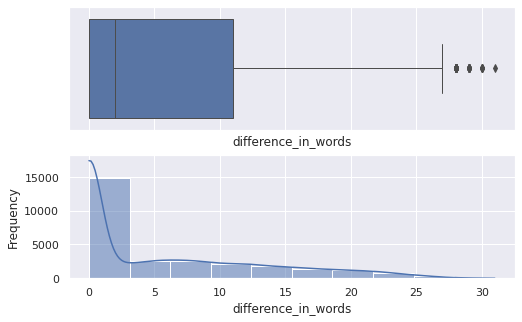

In [32]:
for i in train[columns]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(train[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(train[i], ax=ax_hist, bins = 10,kde=True)

* Characters_length=Are in between 1 & 141 and Mostly are in between 40 and 60
* Word_count=Are in between 1 & 36 and Mostly are in between 5 and 10
* Unique_words=Are in between 1 & 30 and Mostly are in between 5 and 15
* Stop_words_count=Positively skewed, has outliers and are in between 0 & 20 and mostly in between 2 and 8
* Punctuaton_count=Biased, has so many outliers and range is from 0 to 100
* Words_count in selected text=Positively skewed and are ranging from 1to 36 and mostly in between 1 and 5
* Difference in words count between text and selected text has positively skewed distribution which are ranging from 0 to 32

# So let's further grill the meta features w.r.t sentiment type

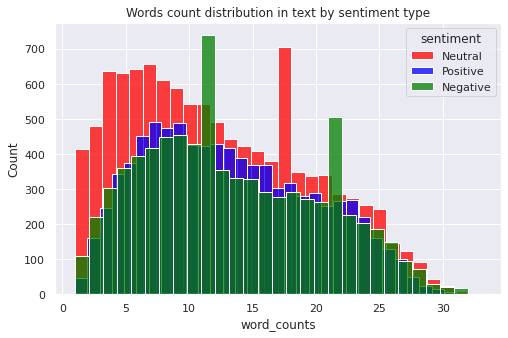

In [33]:
sns.histplot(x='word_counts',data=neutral,color='red',legend=False)
sns.histplot(x='word_counts',data=positive,color='blue',legend=False)
sns.histplot(x='word_counts',data=negative,color='green',legend=False)
plt.legend(title='sentiment', loc='upper right', labels=['Neutral', 'Positive','Negative'])
plt.title('Words count distribution in text by sentiment type')
plt.show()

* Words are more in neutral tweets, Max in the length of 18
* Negative tweets are having less words except for word count 12

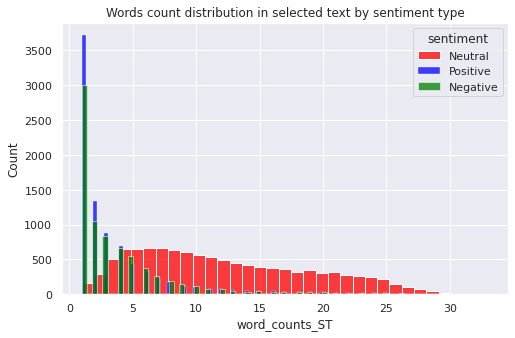

In [34]:
sns.histplot(x='word_counts_ST',data=neutral,color='red',legend=False)
sns.histplot(x='word_counts_ST',data=positive,color='blue',legend=False)
sns.histplot(x='word_counts_ST',data=negative,color='green',legend=False)
plt.legend(title='sentiment', loc='upper right', labels=['Neutral', 'Positive','Negative'])
plt.title('Words count distribution in selected text by sentiment type')
plt.show()

* When comes to selected text ,Positive and negative tweets are highly positively skewed
* Positive and negative tweets are mostly less than 5 where as for neutral less than 20

In [35]:
train.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'length', 'word_counts',
       'Unique_words', 'stop_words_count', 'mean_word_length',
       'Punctuation_count', 'word_counts_ST', 'difference_in_words'],
      dtype='object')

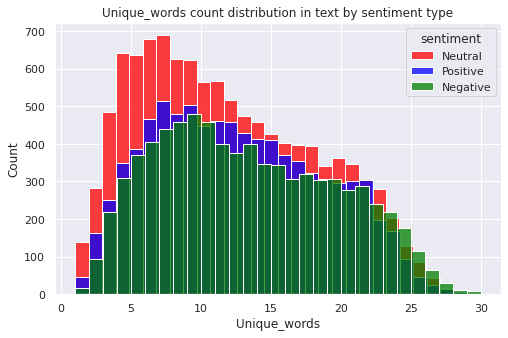

In [36]:
sns.histplot(x='Unique_words',data=neutral,color='red',legend=False)
sns.histplot(x='Unique_words',data=positive,color='blue',legend=False)
sns.histplot(x='Unique_words',data=negative,color='green',legend=False)
plt.legend(title='sentiment', loc='upper right', labels=['Neutral', 'Positive','Negative'])
plt.title('Unique_words count distribution in text by sentiment type')
plt.show()

Nothing new observation, same like previous graph.Let's look for other columns

## Stopwords

In [37]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
stop=set(stopwords.words('english'))
def preprocess_news(df,stop=stop,n=1,col='text'):
    '''Function to preprocess and create corpus'''
    new_corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for text in df[col]:
        words=[w for w in word_tokenize(text) if (w not in stop)]
       
        words=[lem.lemmatize(w) for w in words if(len(w)>n)]
     
        new_corpus.append(words)
        
    new_corpus=[word for l in new_corpus for word in l]
    return new_corpus

Text(0.5, 0.98, 'Common stopwords in different sentiments')

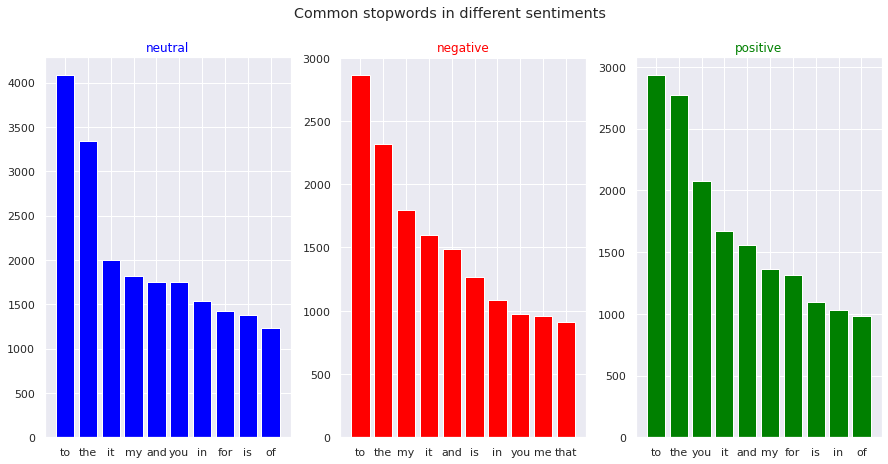

In [39]:

fig,ax=plt.subplots(1,3,figsize=(15,7))
for i in range(3):
    new=train[train['sentiment']==sent[i]]
    corpus_train=preprocess_news(new,{})
    
    dic=defaultdict(int)
    for word in corpus_train:
        if word  in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    ax[i].bar(x,y,color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])

fig.suptitle("Common stopwords in different sentiments")

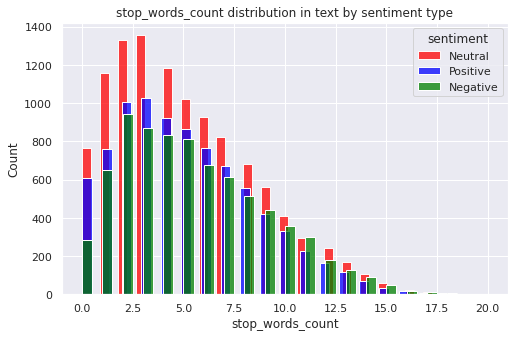

In [40]:
sns.histplot(x='stop_words_count',data=neutral,color='red',legend=False)
sns.histplot(x='stop_words_count',data=positive,color='blue',legend=False)
sns.histplot(x='stop_words_count',data=negative,color='green',legend=False)
plt.legend(title='sentiment', loc='upper right', labels=['Neutral', 'Positive','Negative'])
plt.title('stop_words_count distribution in text by sentiment type')
plt.show()

## Punctuation

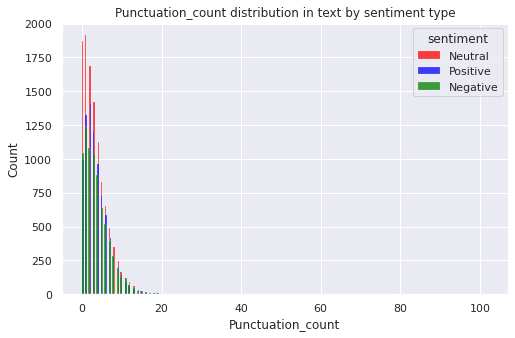

In [41]:
sns.histplot(x='Punctuation_count',data=neutral,color='red',legend=False)
sns.histplot(x='Punctuation_count',data=positive,color='blue',legend=False)
sns.histplot(x='Punctuation_count',data=negative,color='green',legend=False)
plt.legend(title='sentiment', loc='upper right', labels=['Neutral', 'Positive','Negative'])
plt.title('Punctuation_count distribution in text by sentiment type')
plt.show()

Text(0.5, 0.98, 'Punctuations in tweets')

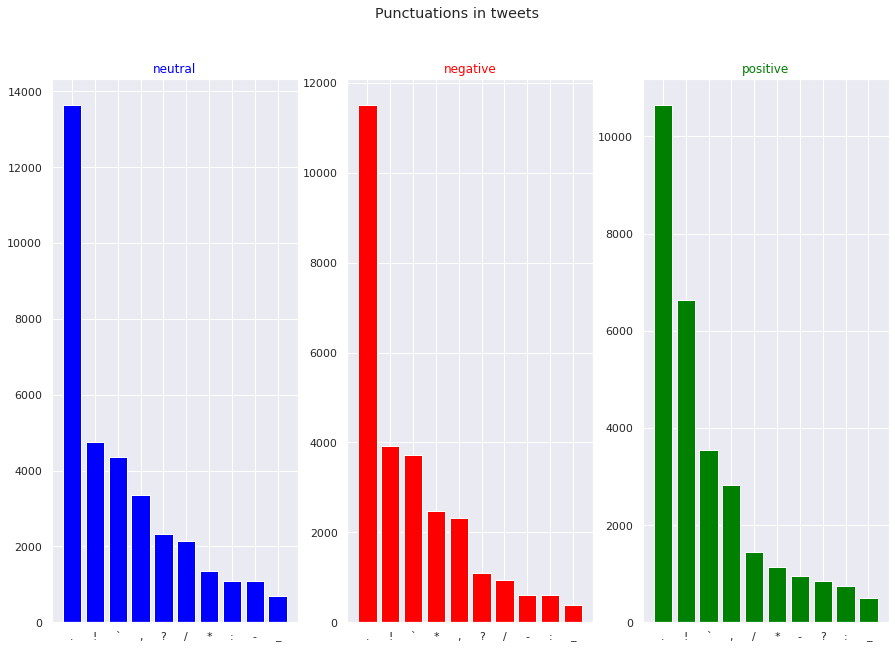

In [42]:
train['punc']=train['text'].apply(lambda x : [c for c in x if c in string.punctuation])
fig,ax=plt.subplots(1,3,figsize=(15,10))
for i in range(3):
    new=train[train['sentiment']==sent[i]]['punc']
    punc=[p for pun in new.values for p in pun]
    counter=Counter(punc).most_common(10)
    x,y=zip(*counter)
    ax[i].bar(x,y,color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
    
fig.suptitle("Punctuations in tweets")

# 7.Word Cloud for tweets

In [43]:
stopwords=set(STOPWORDS)
def word_cloud(data,title=None,ax=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    max_font_size=30,
    scale=3,
    random_state=42)
    wordcloud=wordcloud.generate(str(data))
    ax.imshow(wordcloud,interpolation='nearest')
    ax.axis('off')

# Wordcloud for text

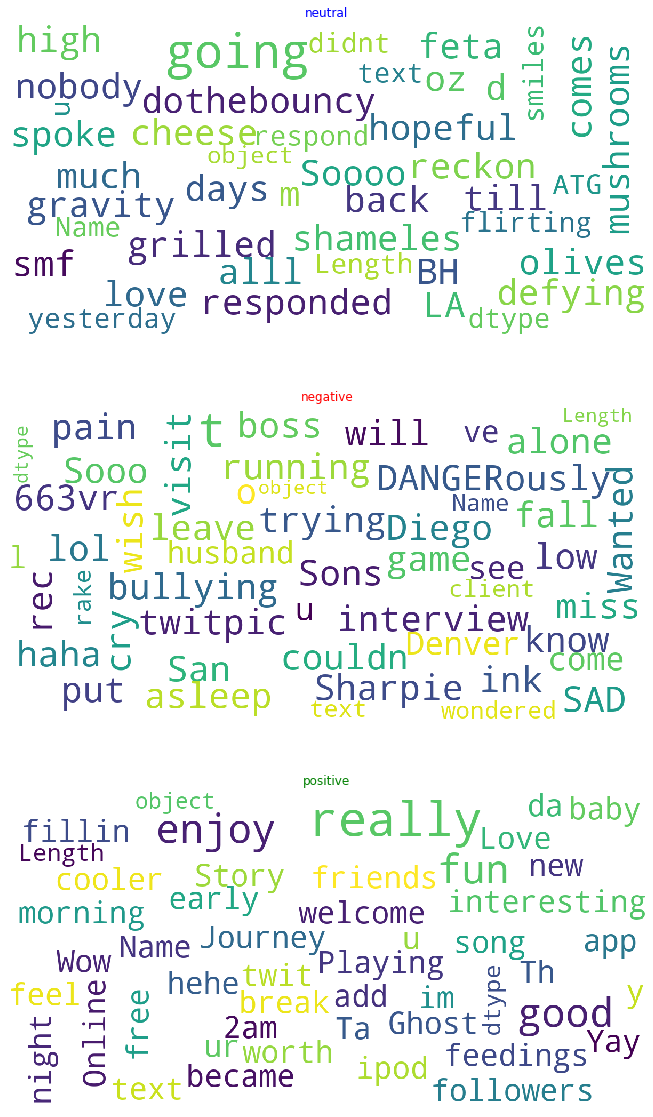

In [44]:
fig,ax=plt.subplots(3,1,figsize=(25,20))
for i in range(3):
    new=train[train['sentiment']==sent[i]]['text']
    word_cloud(new,ax=ax[i])
    ax[i].set_title(sent[i],color=colors[i])


# word cloud for selected text

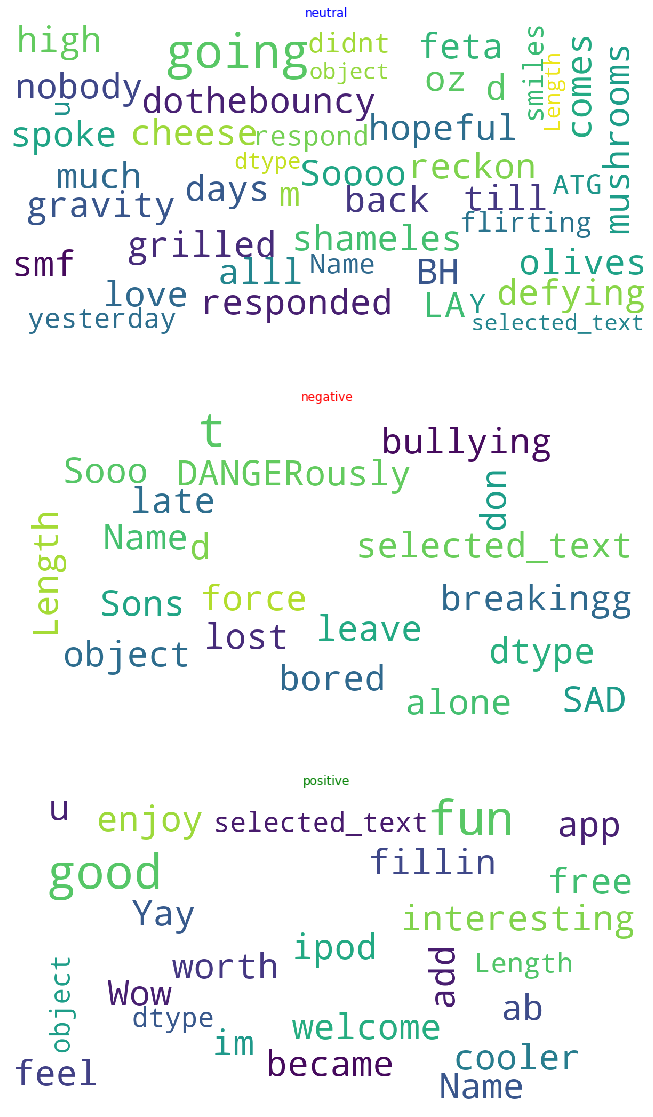

In [45]:
fig,ax=plt.subplots(3,1,figsize=(25,20))
for i in range(3):
    new=train[train['sentiment']==sent[i]]['selected_text'].dropna()
    word_cloud(new,ax=ax[i])
    ax[i].set_title(sent[i],color=colors[i])

# 8.Cleaning

In [46]:
def cleaning(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [47]:
def clean(df):
    for col in ['text','selected_text']:
        df[col]=df[col].astype(str).apply(lambda x:cleaning(x))
    return df

In [48]:
df_train = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/train.csv')
df_test = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/test.csv')
df_sample = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/sample_submission.csv')

In [49]:
df_train=clean(df_train)

# Most common word in tweets

Text(0.5, 0.98, 'Common words in tweet text')

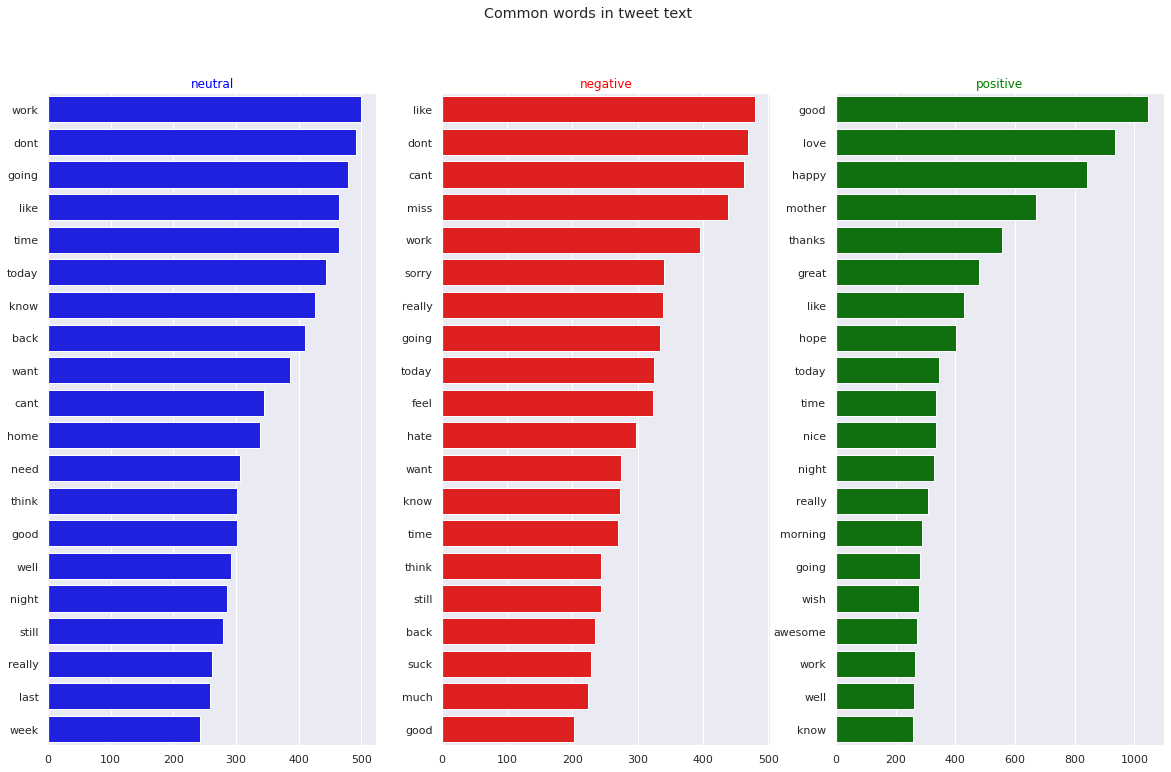

In [50]:
fig,ax=plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    new=df_train[df_train['sentiment']==sent[i]]
    corpus_train=preprocess_news(new,n=3)
    counter=Counter(corpus_train)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:20]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
fig.suptitle("Common words in tweet text")

* It is evident that there are more positive words like good,thanks etc on positive tweets.
* It can be observed that there are a lot of negative words in negative tweets.
* words like Work,today is there common in all three type of tweets

## It's shocking to see good word in top negative tweets. May be it relied on context of the sentence

# Most common words in select text

Text(0.5, 0.98, 'Common words in selected text')

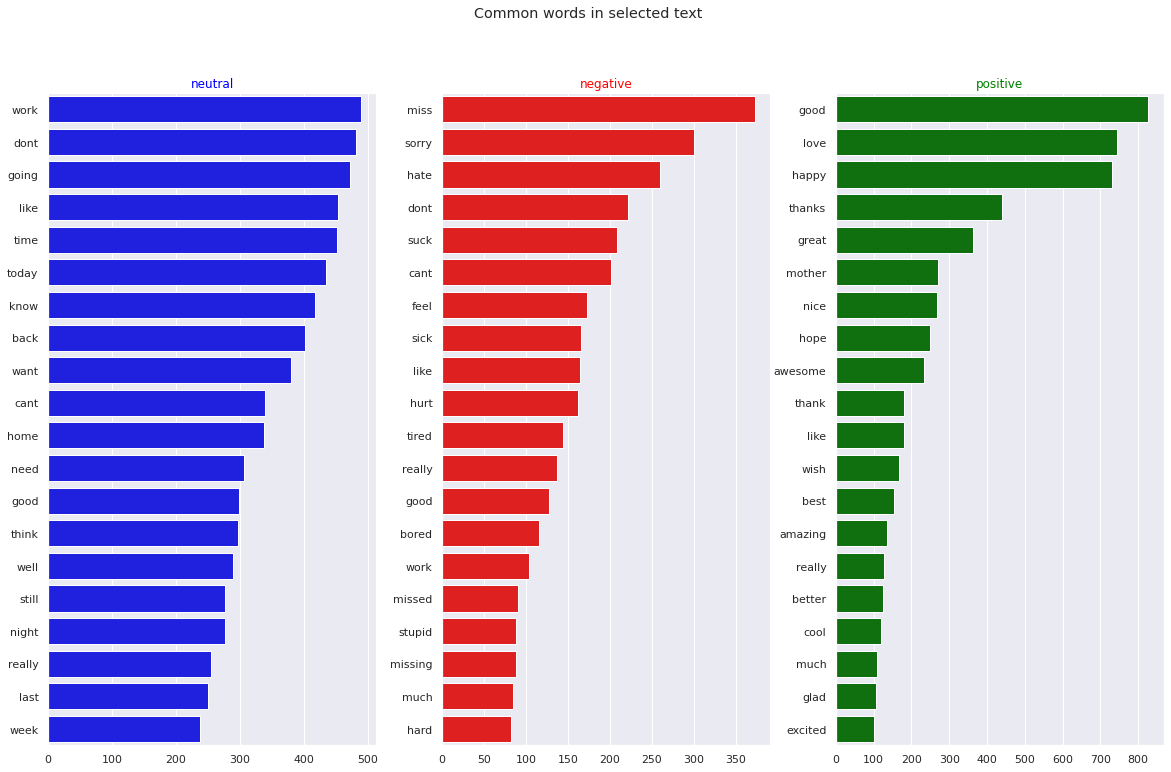

In [51]:

fig,ax=plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    new=df_train[df_train['sentiment']==sent[i]]   
    corpus=preprocess_news(new,n=3,col='selected_text')
    counter=Counter(corpus)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:20]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
fig.suptitle("Common words in selected text")

The above trend repreats here ,here it is more evident and clear.
Let's dig bit further for positive ane negetive words...

In [52]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n),stop_words=stop).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

# Bigram check

Text(0.5, 0.98, 'Common bigrams in selected text')

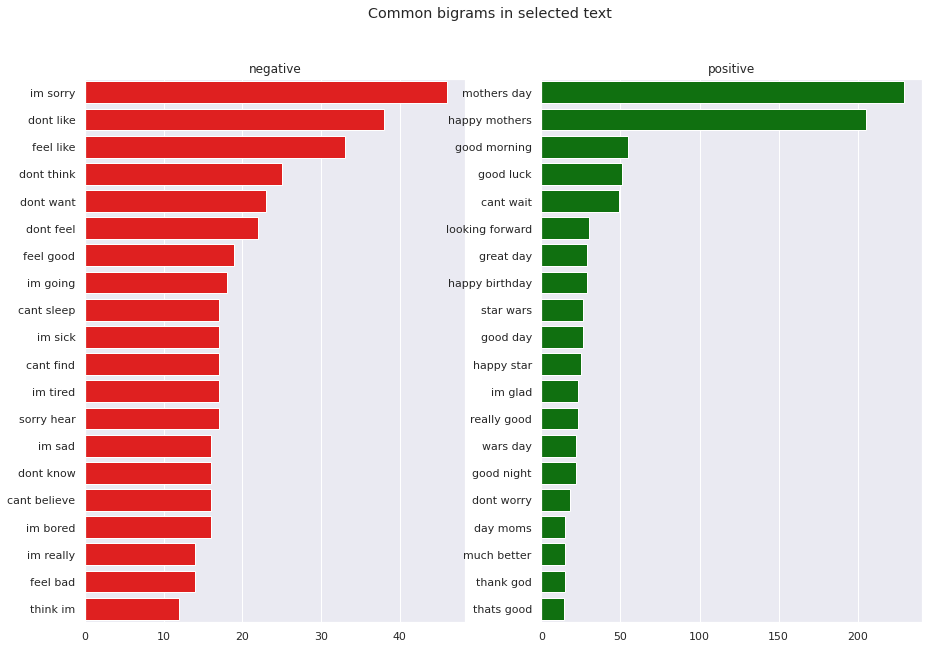

In [53]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
for i in range(2):
    new=df_train[df_train['sentiment']==sent[i+1]]['selected_text']
    top_n_bigrams=get_top_ngram(new,2)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i+1])
    ax[i].set_title(sent[i+1])
    
fig.suptitle("Common bigrams in selected text")

* I am not satisfied, let's check trigrams

# Trigram

Text(0.5, 0.98, 'Common bigrams in selected text')

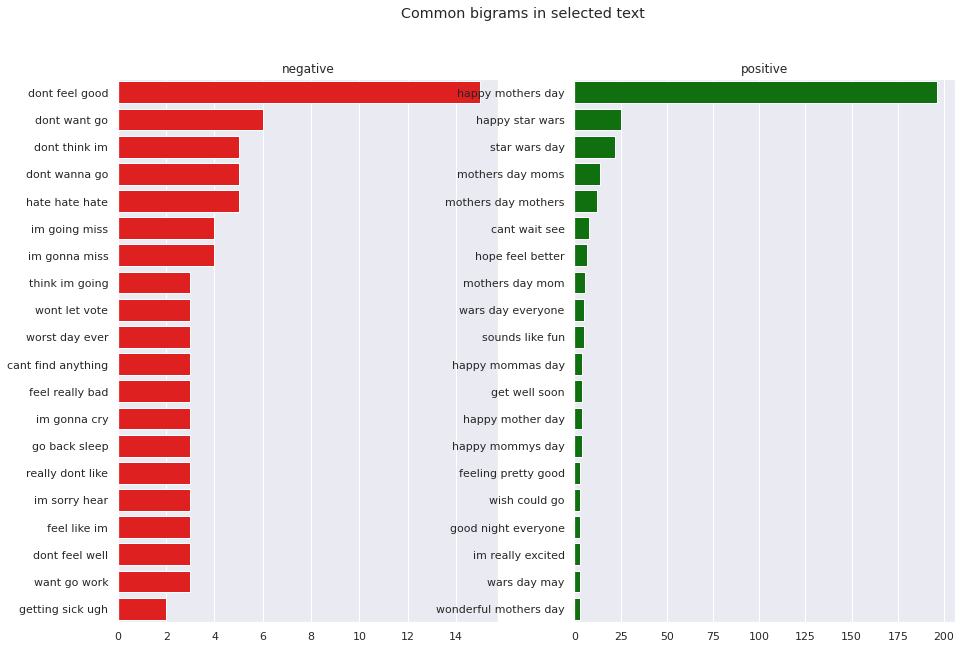

In [54]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
for i in range(2):
    new=df_train[df_train['sentiment']==sent[i+1]]['selected_text']
    top_n_bigrams=get_top_ngram(new,3)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i+1])
    ax[i].set_title(sent[i+1])
    
fig.suptitle("Common bigrams in selected text")

### Yes, finally cracked the feel good words in negative tweet.It's actually 'don't feel good'

# Plotting jaccard scores

In [55]:
def jaccard(str1, str2): 
    a = set(str(str1).lower().split()) 
    b = set(str(str2).lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))
def plot_jaccard(sentiment,ax):
    jacc=[]
    text=train[train['sentiment']==sentiment].dropna()['text'].values.tolist()
    selected=train[train['sentiment']==sentiment].dropna()['selected_text'].values.tolist()
    for i,k in zip(text,selected):
        jacc.append(jaccard(i,k))
    ax.hist(jacc,bins=10,color='blue',alpha=0.4)
    ax.set_title(sentiment)

Text(0.5, 0.98, 'jaccard similarity of text and selected text')

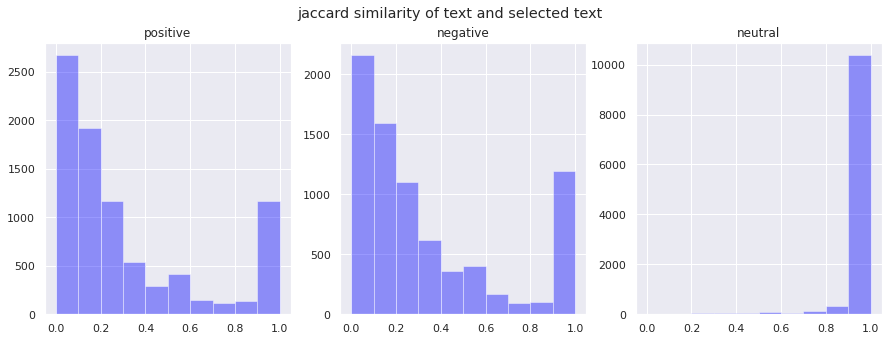

In [56]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
plot_jaccard('positive',ax=ax1)
plot_jaccard('negative',ax2)
plot_jaccard('neutral',ax3)
fig.suptitle('jaccard similarity of text and selected text')

* we can easily observe that the jaccard similarity of most of samples with negative sentiment is close to 1,which means that most of the text is in selected text.
* Also there are some examples in positive and negative tweets with similarity of 1 (entire text)

## Thank you for staying till last moment!!
## Please upvote if you liked it and suggest if there is any thing to be modified/added